In [1]:
import torch

In [2]:
torch.__version__

'1.12.1+cu113'

In [3]:
torch.tensor

<function torch._VariableFunctionsClass.tensor>

In [4]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]) 
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [5]:
#height of people
t_c = torch.tensor([58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0])

In [6]:
#weight of people
t_u = torch.tensor([115.0, 117.0, 120.0, 123.0, 126.0, 129.0, 132.0, 135.0, 139.0, 142.0, 146.0, 150.0, 154.0, 159.0,164.0])

In [7]:
def model(t_u, w, b):
    return w * t_u + b

In [8]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [9]:
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)
t_p

tensor([115., 117., 120., 123., 126., 129., 132., 135., 139., 142., 146., 150.,
        154., 159., 164.])

In [10]:
loss = loss_fn(t_p, t_c)
loss

tensor(5259.7334)

In [11]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, 
                                       w + delta, b), 
                                 t_c) - loss_fn(model(t_u, w - delta, b), 
                                                t_c)) / (2.0 * delta)

In [12]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [13]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - 
                         loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [14]:
b

tensor([544.])

In [15]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10, 5, requires_grad=True)
target = torch.randn(10, 5)
output = loss(input, target)
output.backward()

In [16]:
output.grad_fn

In [17]:
input

tensor([[-0.5268, -0.7707,  0.5112,  0.1572,  0.2268],
        [ 0.2720, -1.3026,  0.2371,  0.3954,  0.7400],
        [-0.2839, -0.2641,  0.1977, -0.0934, -0.0990],
        [-0.6195,  0.0142,  0.3121,  0.5909,  0.5588],
        [ 0.3891, -1.2945,  0.5513,  0.2446, -1.5707],
        [-0.9003,  0.6080, -0.9243,  0.1754, -2.2543],
        [-0.8235, -1.3053, -0.8834,  1.7251, -1.3877],
        [-0.4979, -0.9662,  0.1253,  0.4133, -0.1736],
        [ 0.2094,  3.2576, -0.5460,  0.2306,  0.1181],
        [-0.9676,  1.4288, -0.5637,  1.0269, -0.8997]], requires_grad=True)

In [18]:
target

tensor([[-0.5764, -1.0931, -0.1727,  0.7890,  0.3854],
        [-0.3982,  0.3382,  0.8616, -0.1692,  0.3210],
        [-0.4350,  0.3174,  0.0790,  2.4508, -1.5969],
        [-0.2925, -0.3188,  0.1758, -1.1196,  1.0864],
        [ 0.1737,  0.7176,  0.0347, -1.7297, -0.1627],
        [-0.0179, -0.5275,  0.0436, -1.3834,  1.6539],
        [-0.7604,  0.1109, -0.6404, -0.5157,  0.4097],
        [ 2.1788, -1.8991, -1.1106,  2.1478,  0.0326],
        [-1.9859,  0.3385,  0.4707,  1.5753, -0.3738],
        [-1.1005,  0.2080,  0.7530,  2.0842, -0.9348]])

In [19]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

In [20]:
def model(t_u, w, b):
    return w * t_u + b

In [21]:
def dmodel_dw(t_u, w, b):
    return t_u

In [22]:
def dmodel_db(t_u, w, b):
    return 1.0

In [23]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [24]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.005

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 5259.733398
Params: tensor([1., 0.])
Grad: tensor([19936.2676,   143.4667])
Epoch 1, Loss 186035504.000000
Params: tensor([-98.6813,  -0.7173])
Grad: tensor([-3752242.2500,   -27117.4902])
Epoch 2, Loss 6590070521856.000000
Params: tensor([18662.5293,   134.8701])
Grad: tensor([7.0622e+08, 5.1037e+06])
Epoch 3, Loss 233444752576479232.000000
Params: tensor([-3512420.2500,   -25383.7266])
Grad: tensor([-1.3292e+11, -9.6058e+08])
Epoch 4, Loss 8269476984680406319104.000000
Params: tensor([6.6108e+08, 4.7775e+06])
Grad: tensor([2.5017e+13, 1.8079e+11])
Epoch 5, Loss 292935605609336913040244736.000000
Params: tensor([-1.2442e+11, -8.9919e+08])
Grad: tensor([-4.7085e+15, -3.4027e+13])
Epoch 6, Loss 10376864338620773720886624649216.000000
Params: tensor([2.3418e+13, 1.6924e+11])
Grad: tensor([8.8619e+17, 6.4043e+15])
Epoch 7, Loss 367587062029343334963344105522855936.000000
Params: tensor([-4.4075e+15, -3.1852e+13])
Grad: tensor([-1.6679e+20, -1.2054e+18])
Epoch 8, Loss inf
Par

tensor([2.9386e+22, 2.1237e+20])

In [25]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.1

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 5259.733398
Params: tensor([1., 0.])
Grad: tensor([19936.2676,   143.4667])
Epoch 1, Loss 75167318016.000000
Params: tensor([-1992.6268,   -14.3467])
Grad: tensor([-75423624.0000,   -545075.6875])
Epoch 2, Loss 1075861270101491712.000000
Params: tensor([7540370.0000,   54493.2227])
Grad: tensor([2.8535e+11, 2.0621e+09])
Epoch 3, Loss 15398684787475107786260480.000000
Params: tensor([-2.8527e+10, -2.0616e+08])
Grad: tensor([-1.0795e+15, -7.8016e+12])
Epoch 4, Loss 220399575658952866185751671341056.000000
Params: tensor([1.0792e+14, 7.7995e+11])
Grad: tensor([4.0841e+18, 2.9515e+16])
Epoch 5, Loss inf
Params: tensor([-4.0830e+17, -2.9507e+15])
Grad: tensor([-1.5451e+22, -1.1166e+20])
Epoch 6, Loss inf
Params: tensor([1.5447e+21, 1.1163e+19])
Grad: tensor([5.8456e+25, 4.2245e+23])
Epoch 7, Loss inf
Params: tensor([-5.8440e+24, -4.2234e+22])
Grad: tensor([-2.2115e+29, -1.5982e+27])
Epoch 8, Loss inf
Params: tensor([2.2109e+28, 1.5978e+26])
Grad: tensor([8.3667e+32, 6.0465e+30

tensor([3.1645e+35, 2.2869e+33])

In [26]:
t_un = 0.1 * t_u

In [27]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.05

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 2642.455322
Params: tensor([1., 0.])
Grad: tensor([-1412.0094,  -102.6533])
Epoch 1, Loss 855426.562500
Params: tensor([71.6005,  5.1327])
Grad: tensor([25443.8555,  1838.2997])
Epoch 2, Loss 277741792.000000
Params: tensor([-1200.5923,   -86.7823])
Grad: tensor([-458472.5938,  -33135.7656])
Epoch 3, Loss 90178641920.000000
Params: tensor([21723.0391,  1570.0060])
Grad: tensor([8261228.5000,  597062.7500])
Epoch 4, Loss 29279670763520.000000
Params: tensor([-391338.4062,  -28283.1328])
Grad: tensor([-1.4886e+08, -1.0758e+07])
Epoch 5, Loss 9506670665269248.000000
Params: tensor([7051624.0000,  509641.7500])
Grad: tensor([2.6823e+09, 1.9386e+08])
Epoch 6, Loss 3086674660696260608.000000
Params: tensor([-1.2706e+08, -9.1832e+06])
Grad: tensor([-4.8332e+10, -3.4931e+09])
Epoch 7, Loss 1002197424815313256448.000000
Params: tensor([2.2896e+09, 1.6547e+08])
Grad: tensor([8.7090e+11, 6.2943e+10])
Epoch 8, Loss 325398655933994485415936.000000
Params: tensor([-4.1256e+10, -2.9817e

tensor([-1.3395e+13, -9.6810e+11])

In [28]:
params = torch.tensor([1.0, 0.0])

nepochs = 50

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    params = params - learning_rate * grad
    
params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 20719.347656
Epoch 2, Loss 162827.593750
Epoch 3, Loss 1279985.125000
Epoch 4, Loss 10062318.000000
Epoch 5, Loss 79103048.000000
Epoch 6, Loss 621853952.000000
Epoch 7, Loss 4888591872.000000
Epoch 8, Loss 38430781440.000000
Epoch 9, Loss 302116569088.000000
Epoch 10, Loss 2375034339328.000000
Epoch 11, Loss 18670906507264.000000
Epoch 12, Loss 146777923649536.000000
Epoch 13, Loss 1153867660132352.000000
Epoch 14, Loss 9070918315802624.000000
Epoch 15, Loss 71309389260128256.000000
Epoch 16, Loss 560585831622901760.000000
Epoch 17, Loss 4406944308951777280.000000
Epoch 18, Loss 34644388734291673088.000000
Epoch 19, Loss 272350472759370842112.000000
Epoch 20, Loss 2141033499375093940224.000000
Epoch 21, Loss 16831337790268866822144.000000
Epoch 22, Loss 132316495642484061241344.000000
Epoch 23, Loss 1040181994414955875532800.000000
Epoch 24, Loss 8177203569584742917472256.000000
Epoch 25, Loss 64283573459572482807693312.000000
Epoch 26, Loss 505

tensor([-9.0577e+22, -6.5463e+21])

In [29]:
def model(t_u, w, b):
    return w * t_u + b

In [30]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [31]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

loss = loss_fn(model(t_u, *params), t_c)

In [32]:
params.grad is None

True

In [33]:
loss.backward()

In [34]:
params.grad

tensor([19936.2676,   143.4667])

In [35]:
if params.grad is not None:
    params.grad.zero_()

In [36]:
def model(t_u, w, b):
    return w * t_u + b

In [37]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [38]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000

learning_rate = 1e-2

In [39]:
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    if params.grad is not None:
        params.grad.zero_()

    loss.backward()

    #params.grad.clamp_(-1.0, 1.0)
    #print(params, params.grad)

    params = (params - learning_rate * params.grad).detach().requires_grad_()

params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 20719.347656
Epoch 2, Loss 162827.593750
Epoch 3, Loss 1279986.125000
Epoch 4, Loss 10062322.000000
Epoch 5, Loss 79103104.000000
Epoch 6, Loss 621854592.000000
Epoch 7, Loss 4888599552.000000
Epoch 8, Loss 38430834688.000000
Epoch 9, Loss 302117060608.000000
Epoch 10, Loss 2375038533632.000000
Epoch 11, Loss 18670931673088.000000
Epoch 12, Loss 146778192084992.000000
Epoch 13, Loss 1153870344486912.000000
Epoch 14, Loss 9070941938122752.000000
Epoch 15, Loss 71309573943721984.000000
Epoch 16, Loss 560587274731913216.000000
Epoch 17, Loss 4406956403579682816.000000
Epoch 18, Loss 34644498685454450688.000000
Epoch 19, Loss 272351528290533507072.000000
Epoch 20, Loss 2141042225099371970560.000000
Epoch 21, Loss 16831417729162252648448.000000
Epoch 22, Loss 132317162175228912074752.000000
Epoch 23, Loss 1040187686964884871839744.000000
Epoch 24, Loss 8177246804141165674233856.000000
Epoch 25, Loss 64283956229512012280889344.000000
Epoch 26, Loss 505

tensor([nan, nan], requires_grad=True)

In [40]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [41]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-5

optimizer = optim.SGD([params], lr=learning_rate)

In [42]:
t_p = model(t_u, *params)

loss = loss_fn(t_p, t_c)

loss.backward()

optimizer.step()

params

tensor([ 0.8006, -0.0014], requires_grad=True)

In [43]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)

loss = loss_fn(t_p, t_c)

optimizer.zero_grad()

loss.backward()

optimizer.step()

params

tensor([15.1201,  1.0265], requires_grad=True)

In [44]:
def model(t_u, w, b):
    return w * t_u + b

In [45]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [46]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

In [47]:
for epoch in range(nepochs):
    
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()

t_p = model(t_un, *params)

params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 20719.347656
Epoch 2, Loss 162827.593750
Epoch 3, Loss 1279985.750000
Epoch 4, Loss 10062322.000000
Epoch 5, Loss 79103104.000000
Epoch 6, Loss 621854656.000000
Epoch 7, Loss 4888599552.000000
Epoch 8, Loss 38430834688.000000
Epoch 9, Loss 302117060608.000000
Epoch 10, Loss 2375038533632.000000
Epoch 11, Loss 18670931673088.000000
Epoch 12, Loss 146778192084992.000000
Epoch 13, Loss 1153869941833728.000000
Epoch 14, Loss 9070939790639104.000000
Epoch 15, Loss 71309569648754688.000000
Epoch 16, Loss 560587274731913216.000000
Epoch 17, Loss 4406955853823868928.000000
Epoch 18, Loss 34644478894245150720.000000
Epoch 19, Loss 272351299592114929664.000000
Epoch 20, Loss 2141040254774534995968.000000
Epoch 21, Loss 16831406470163184222208.000000
Epoch 22, Loss 132317090117634874146816.000000
Epoch 23, Loss 1040186966388944492560384.000000
Epoch 24, Loss 8177241615994394943422464.000000
Epoch 25, Loss 64283910112651828007010304.000000
Epoch 26, Loss 505

tensor([nan, nan], requires_grad=True)

In [48]:
def model(t_u, w, b):
    return w * t_u + b

In [49]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [50]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-1

optimizer = optim.Adam([params], lr=learning_rate)

In [51]:
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

t_p = model(t_u, *params)

params

Epoch 0, Loss 5259.733398
Epoch 1, Loss 3443.706543
Epoch 2, Loss 2025.263306
Epoch 3, Loss 1002.202881
Epoch 4, Loss 357.638672
Epoch 5, Loss 53.362339
Epoch 6, Loss 24.627544
Epoch 7, Loss 181.475266
Epoch 8, Loss 421.412598
Epoch 9, Loss 651.219666
Epoch 10, Loss 806.726135
Epoch 11, Loss 860.188843
Epoch 12, Loss 815.021851
Epoch 13, Loss 694.658386
Epoch 14, Loss 531.592834
Epoch 15, Loss 359.055145
Epoch 16, Loss 205.425629
Epoch 17, Loss 90.802681
Epoch 18, Loss 25.268049
Epoch 19, Loss 8.697301
Epoch 20, Loss 32.116180
Epoch 21, Loss 80.485817
Epoch 22, Loss 136.450897
Epoch 23, Loss 184.215622
Epoch 24, Loss 212.605209
Epoch 25, Loss 216.650604
Epoch 26, Loss 197.548325
Epoch 27, Loss 161.313187
Epoch 28, Loss 116.688774
Epoch 29, Loss 72.884193
Epoch 30, Loss 37.597542
Epoch 31, Loss 15.638277
Epoch 32, Loss 8.321150
Epoch 33, Loss 13.663868
Epoch 34, Loss 27.273088
Epoch 35, Loss 43.663612
Epoch 36, Loss 57.666042
Epoch 37, Loss 65.575539
Epoch 38, Loss 65.793953
Epoch 39, L

tensor([ 0.2879, 25.6386], requires_grad=True)

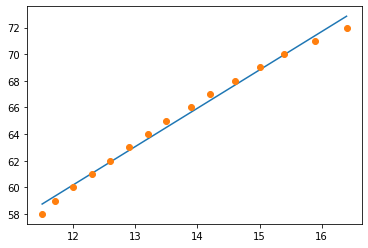

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')

In [53]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([13, 12,  3,  9,  2, 14, 10,  6, 11,  4,  0,  8]), tensor([7, 1, 5]))

In [54]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

In [55]:
def model(t_u, w, b):
    return w * t_u + b

In [56]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [57]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [58]:
for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_un_val, *params)
    loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), 
                                                              float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

t_p = model(t_un, *params)

params

Epoch 0, Training loss 2686.440186, Validation loss 2466.516602
Epoch 1, Training loss 23167.638672, Validation loss 18429.056641
Epoch 2, Training loss 200266.437500, Validation loss 167631.375000
Epoch 3, Training loss 1731621.125000, Validation loss 1424912.375000
Epoch 4, Training loss 14973081.000000, Validation loss 12393081.000000
Epoch 5, Training loss 129470600.000000, Validation loss 106949720.000000
Epoch 6, Training loss 1119518208.000000, Validation loss 925405376.000000
Epoch 7, Training loss 9680356352.000000, Validation loss 8000049152.000000
Epoch 8, Training loss 83704979456.000000, Validation loss 69180956672.000000
Epoch 9, Training loss 723787907072.000000, Validation loss 598184361984.000000
Epoch 10, Training loss 6258516033536.000000, Validation loss 5172482277376.000000
Epoch 11, Training loss 54116726341632.000000, Validation loss 44725771960320.000000
Epoch 12, Training loss 467941384519680.000000, Validation loss 386739256426496.000000
Epoch 13, Training los

tensor([nan, nan], requires_grad=True)

In [59]:
for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)

    with torch.no_grad():
        t_p_val = model(t_un_val, *params)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), 
                                                              float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

params

Epoch 0, Training loss nan, Validation loss nan
Epoch 1, Training loss nan, Validation loss nan
Epoch 2, Training loss nan, Validation loss nan
Epoch 3, Training loss nan, Validation loss nan
Epoch 4, Training loss nan, Validation loss nan
Epoch 5, Training loss nan, Validation loss nan
Epoch 6, Training loss nan, Validation loss nan
Epoch 7, Training loss nan, Validation loss nan
Epoch 8, Training loss nan, Validation loss nan
Epoch 9, Training loss nan, Validation loss nan
Epoch 10, Training loss nan, Validation loss nan
Epoch 11, Training loss nan, Validation loss nan
Epoch 12, Training loss nan, Validation loss nan
Epoch 13, Training loss nan, Validation loss nan
Epoch 14, Training loss nan, Validation loss nan
Epoch 15, Training loss nan, Validation loss nan
Epoch 16, Training loss nan, Validation loss nan
Epoch 17, Training loss nan, Validation loss nan
Epoch 18, Training loss nan, Validation loss nan
Epoch 19, Training loss nan, Validation loss nan
Epoch 20, Training loss nan, V

tensor([nan, nan], requires_grad=True)

In [60]:
#CNN

In [61]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
torch.manual_seed(1)    # reproducible

In [63]:
# Hyper Parameters
EPOCH = 1               
# train the input data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
# 50 samples at a time to pass through the epoch
LR = 0.001              
# learning rate
DOWNLOAD_MNIST = True   
# set to False if you have downloaded

In [64]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     
    # this is training data
    transform=torchvision.transforms.ToTensor(),    
    # torch.FloatTensor of shape (Color x Height x Width) and 
    #normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        
    # download it if you don't have it
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


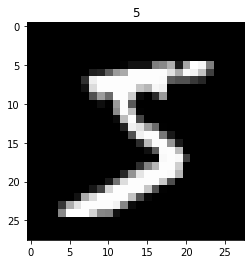

In [65]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [66]:
# Data Loader for easy mini-batch return in training, the image batch shape will be 
#(50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [67]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [68]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  
                # if want same width and length of this image after con2d, 
                #padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    
            # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [69]:
cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [70]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [71]:
import sklearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")


Epoch:  0 | train loss: 2.3034 | test accuracy: 0.12


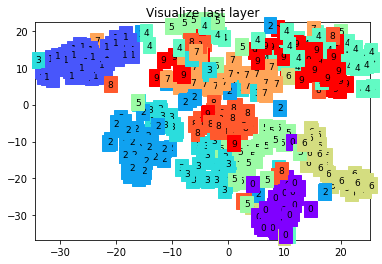

Epoch:  0 | train loss: 0.5555 | test accuracy: 0.87


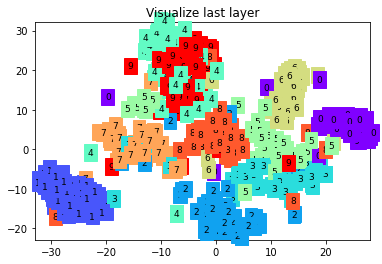

Epoch:  0 | train loss: 0.1278 | test accuracy: 0.94


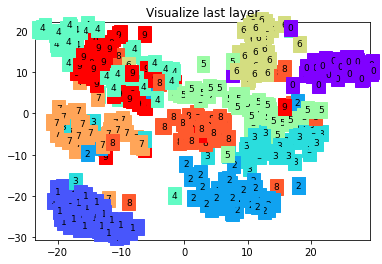

Epoch:  0 | train loss: 0.0557 | test accuracy: 0.95


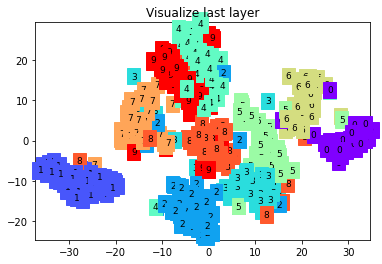

Epoch:  0 | train loss: 0.0350 | test accuracy: 0.96


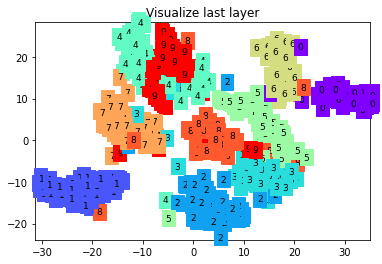

Epoch:  0 | train loss: 0.1830 | test accuracy: 0.97


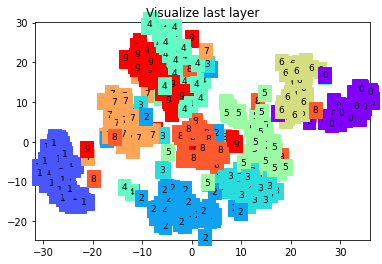

Epoch:  0 | train loss: 0.0186 | test accuracy: 0.97


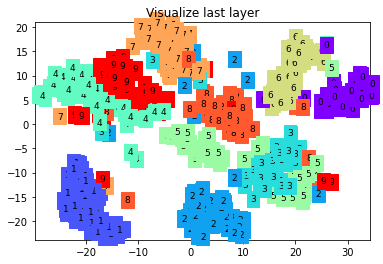

Epoch:  0 | train loss: 0.0945 | test accuracy: 0.97


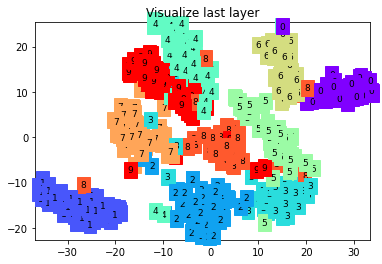

Epoch:  0 | train loss: 0.0387 | test accuracy: 0.96


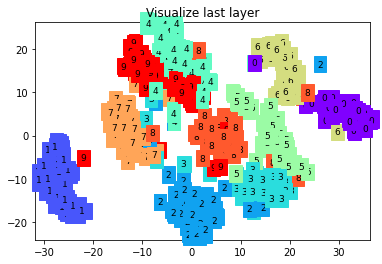

Epoch:  0 | train loss: 0.0954 | test accuracy: 0.98


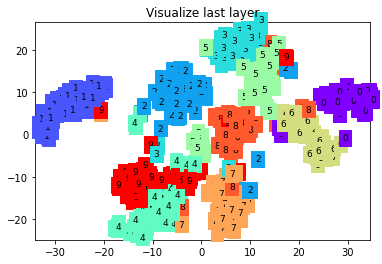

Epoch:  0 | train loss: 0.1963 | test accuracy: 0.98


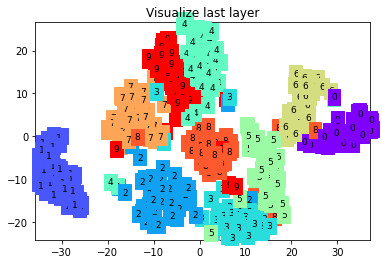

Epoch:  0 | train loss: 0.0201 | test accuracy: 0.98


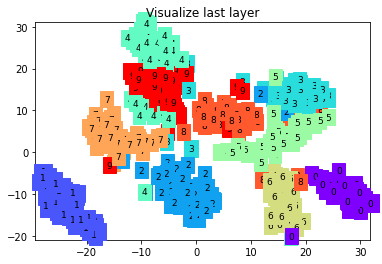

In [72]:
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization, if not there')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer');
    plt.show(); 
    #plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   
        # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, 
                  '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

In [73]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [74]:
#Save and Reload

In [75]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [76]:
#sample data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [77]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [78]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [79]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

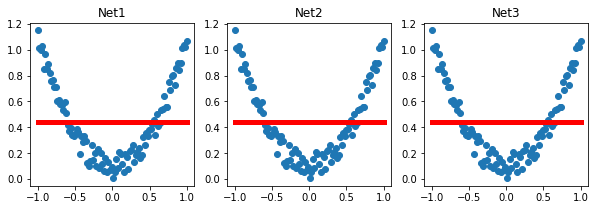

In [80]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

In [81]:
#RNN

In [82]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
torch.manual_seed(1)    # reproducible

In [84]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [85]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


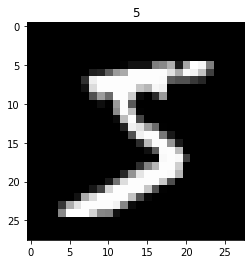

In [86]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [87]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=BATCH_SIZE, shuffle=True)

In [88]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.   
# shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array

In [89]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [90]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [91]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [92]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3088 | test accuracy: 0.09
Epoch:  0 | train loss: 1.3125 | test accuracy: 0.59
Epoch:  0 | train loss: 0.8936 | test accuracy: 0.71
Epoch:  0 | train loss: 0.4285 | test accuracy: 0.83
Epoch:  0 | train loss: 0.2509 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3429 | test accuracy: 0.90
Epoch:  0 | train loss: 0.3704 | test accuracy: 0.86
Epoch:  0 | train loss: 0.4593 | test accuracy: 0.91
Epoch:  0 | train loss: 0.0794 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0768 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1809 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2297 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2210 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2509 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0828 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2879 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0908 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1554 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1557 | test accuracy

In [93]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [94]:
#RNN Regressor

In [95]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
torch.manual_seed(1)    # reproducible

In [97]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

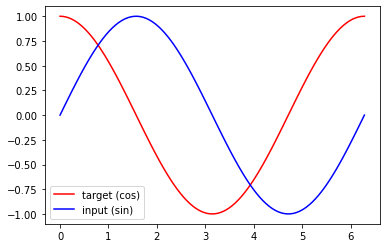

In [98]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [99]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. 
            #(batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [100]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [101]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

In [102]:
h_state = None      # for initial hidden state

In [103]:
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

<Figure size 864x360 with 0 Axes>

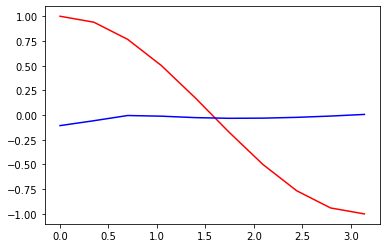

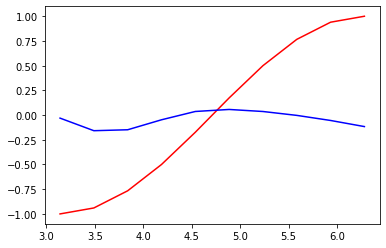

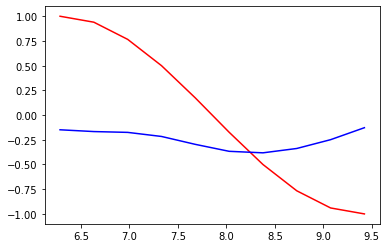

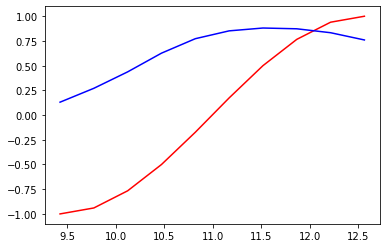

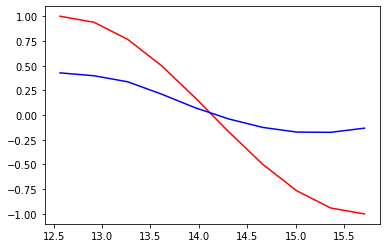

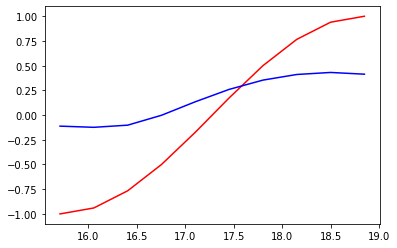

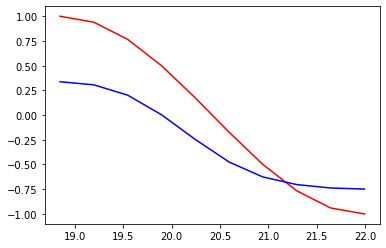

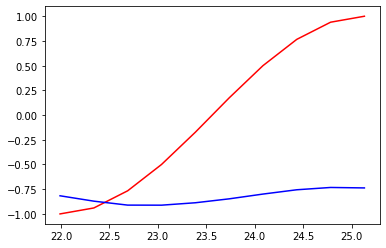

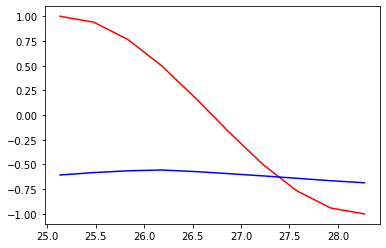

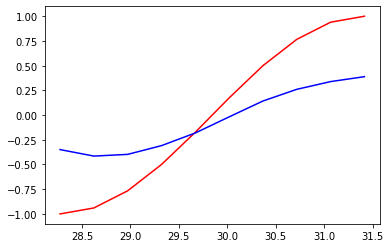

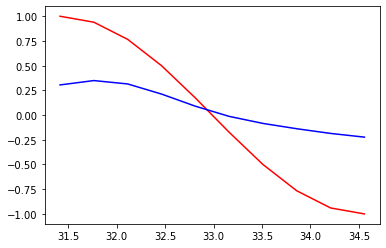

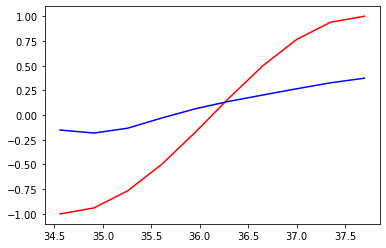

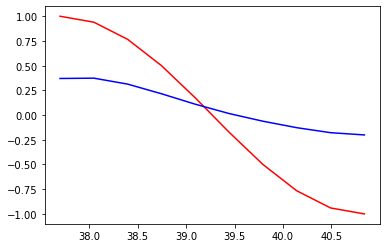

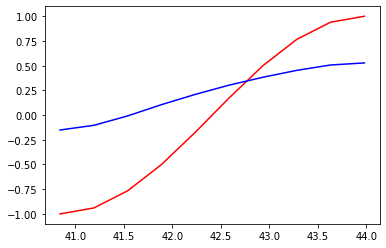

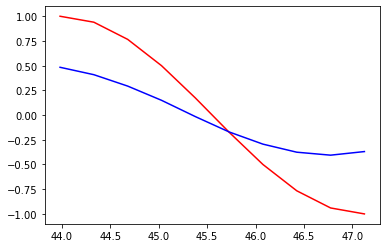

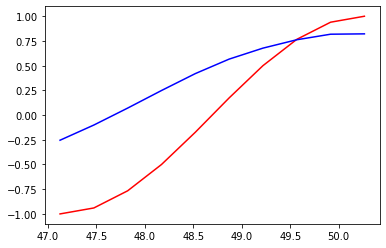

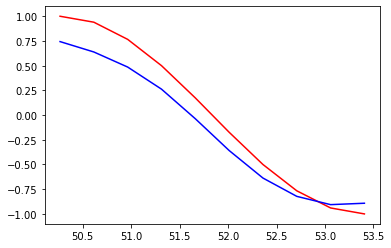

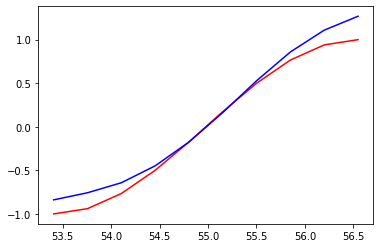

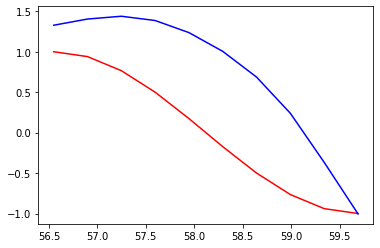

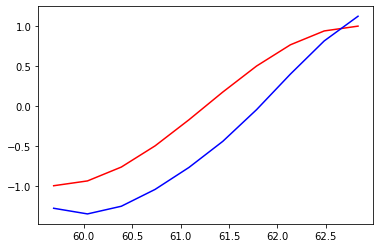

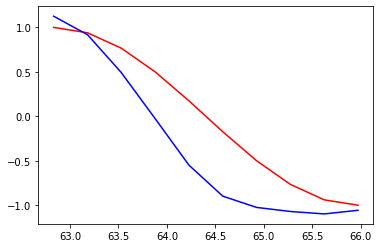

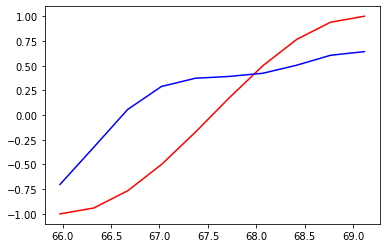

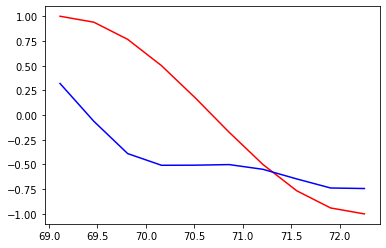

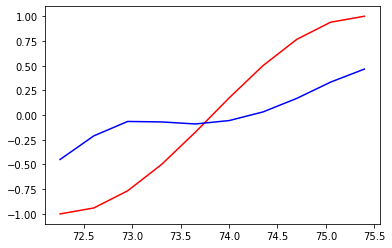

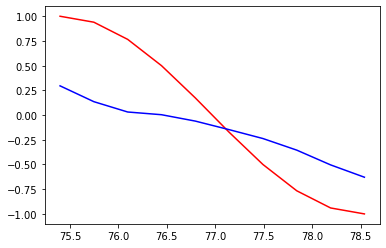

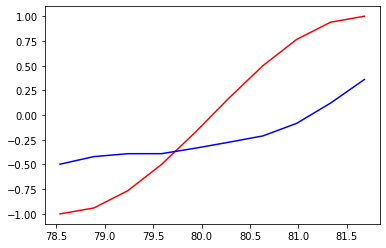

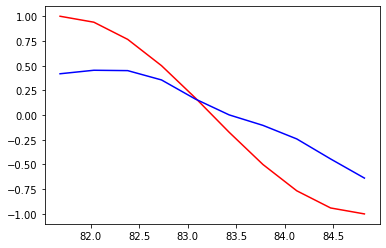

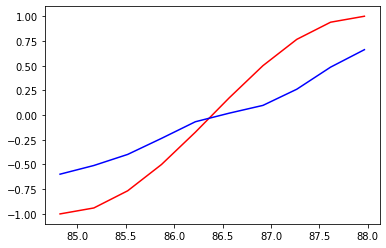

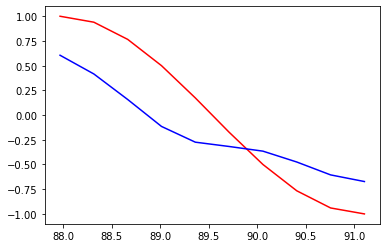

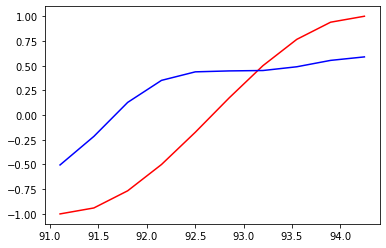

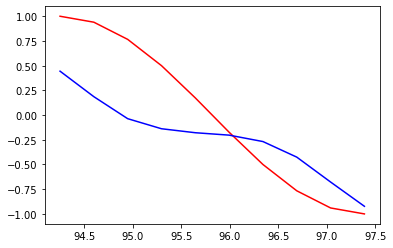

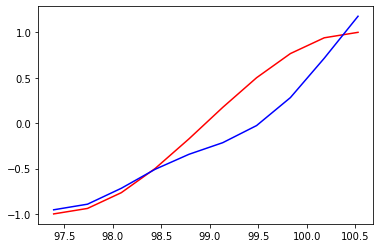

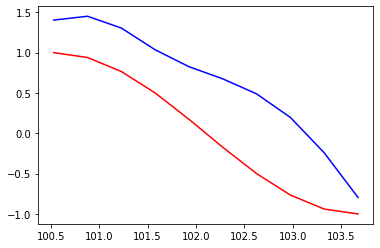

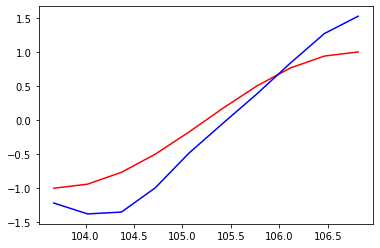

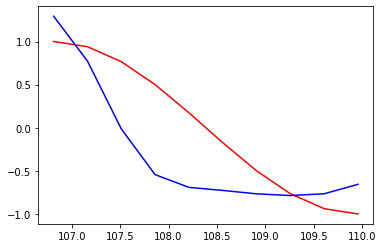

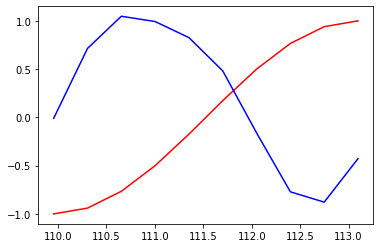

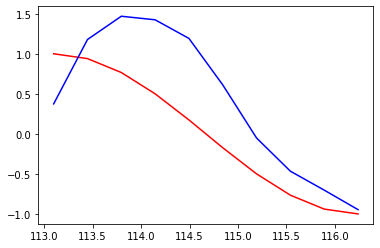

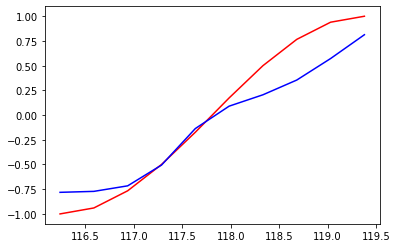

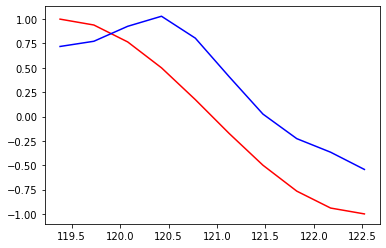

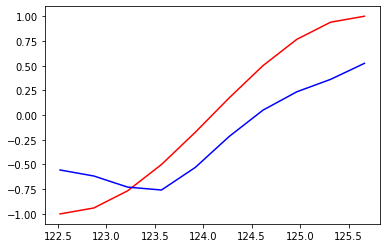

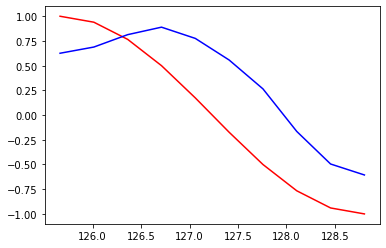

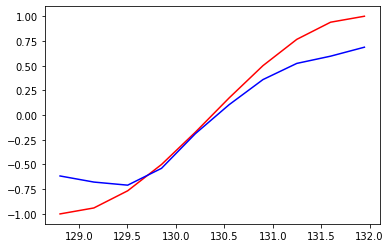

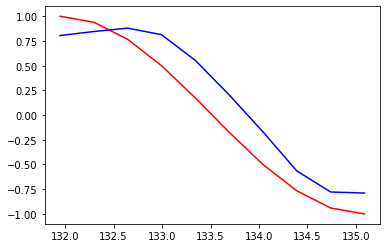

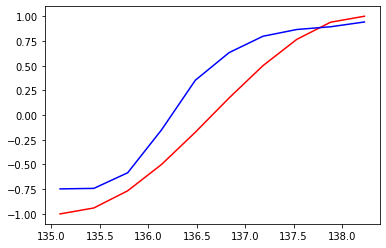

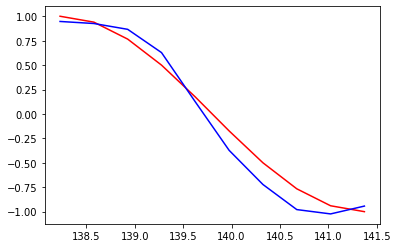

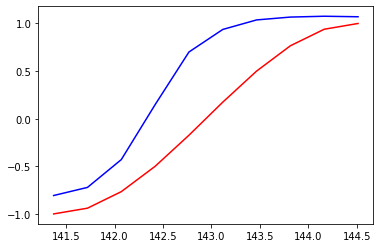

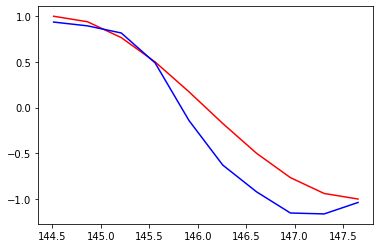

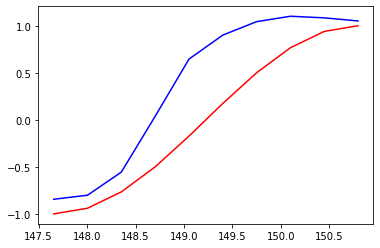

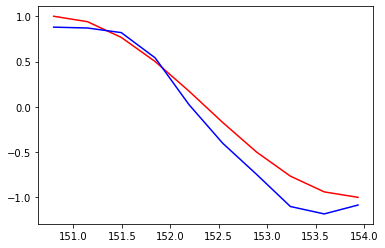

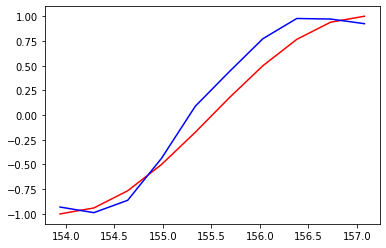

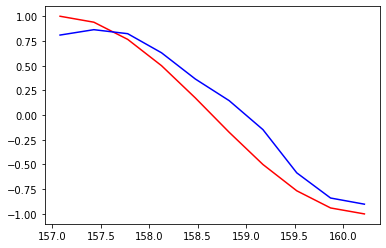

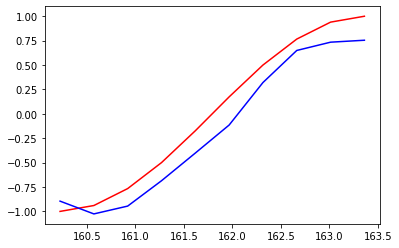

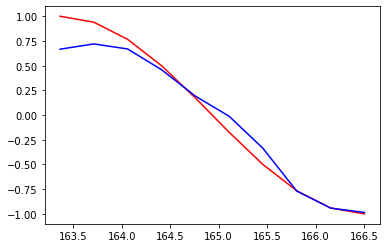

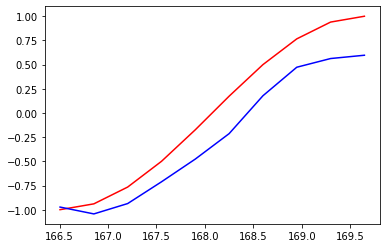

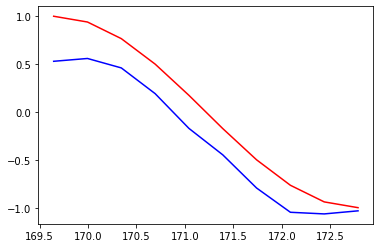

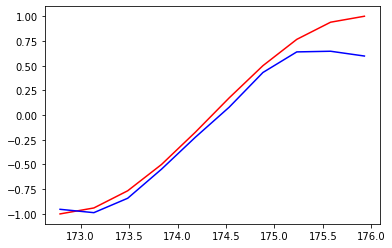

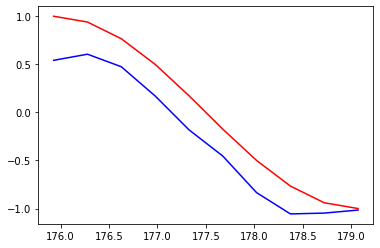

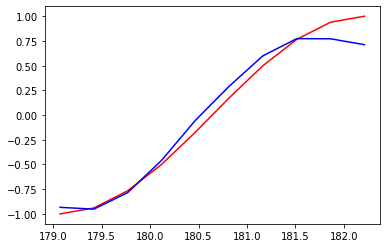

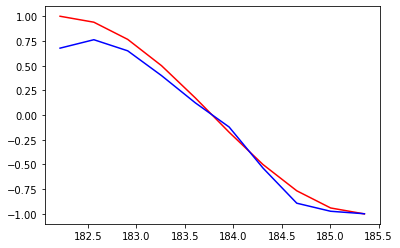

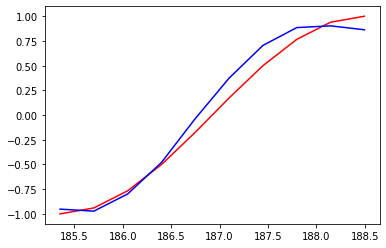

In [104]:
for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    
    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        
    # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

In [105]:
#Autoencoder

In [106]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [107]:
torch.manual_seed(1)    # reproducible

In [108]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [109]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     
    # this is training data
    transform=torchvision.transforms.ToTensor(),    
    # Converts a PIL.Image or numpy.ndarray to
                                                    
    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        
    # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


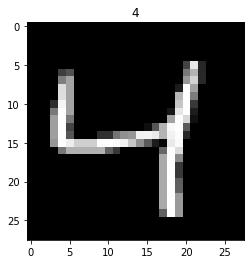

In [110]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [111]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [112]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [113]:
autoencoder = AutoEncoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


Epoch:  0 | train loss: 0.2330


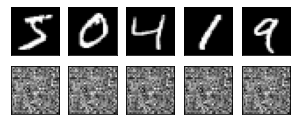

Epoch:  0 | train loss: 0.0606


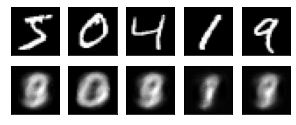

Epoch:  5 | train loss: 0.0397


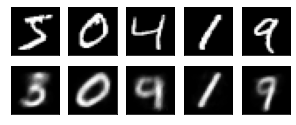

Epoch:  5 | train loss: 0.0432


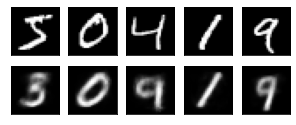

Epoch:  9 | train loss: 0.0375


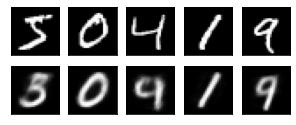

Epoch:  9 | train loss: 0.0406


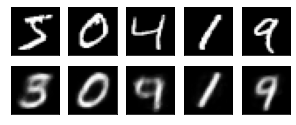

In [114]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data)

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], 
                                          (28, 28)), cmap='gray'); 
                a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], 
                                          (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); #plt.pause(0.05)

In [115]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [116]:
N_SAMPLES = 20
N_HIDDEN = 300

In [117]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
x, y = Variable(x), Variable(y)


In [118]:
# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
test_x, test_y = Variable(test_x, volatile=True), Variable(test_y, volatile=True)


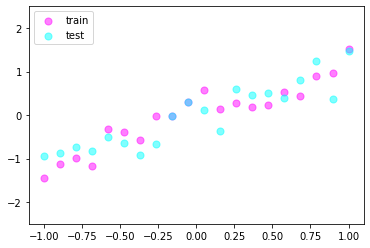

In [119]:
# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [120]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [121]:
net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [122]:
print(net_overfitting)  # net architecture
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [123]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

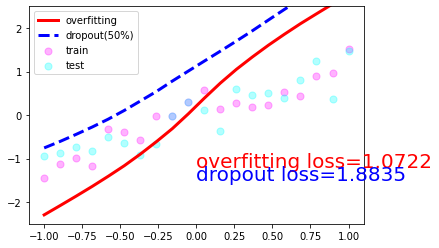

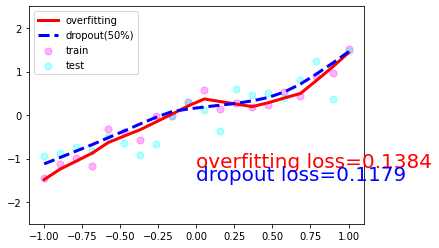

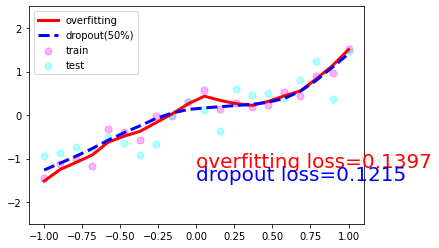

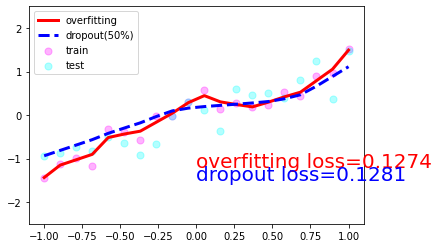

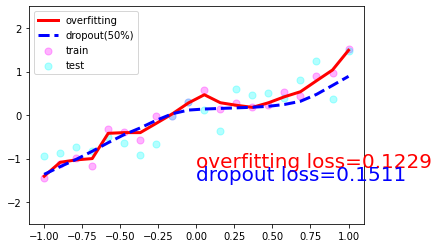

In [124]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

    if t % 100 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, 
                    alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, 
                    alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', 
                 lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', 
                 lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data, 
                 fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data, 
                 fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()
        plt.show()

In [125]:
#Initialize a random tensor

In [126]:
import numpy as np


In [127]:
import torch

In [128]:
torch.Tensor(5, 3)

tensor([[1.1242e-32, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [3.8016e-39, 0.0000e+00, 8.5435e-37]])

In [129]:
#From a uniform distribution

In [130]:
torch.Tensor(5, 3).uniform_(-1, 1)

tensor([[ 0.8790,  0.7375,  0.1182],
        [ 0.3652,  0.1322,  0.8587],
        [ 0.3682, -0.2907,  0.0051],
        [ 0.0886, -0.7588, -0.5371],
        [ 0.0085,  0.0812, -0.6360]])

In [131]:
#getting the shape of the tensor

In [132]:
x = torch.Tensor(5, 3).uniform_(-1, 1)
print(x.size())

torch.Size([5, 3])


In [133]:
#Creation from lists & numpy

In [134]:
z = torch.LongTensor([[1, 3], [2, 9]])
print(z.type())
# Cast to numpy ndarray
print(z.numpy().dtype)

torch.LongTensor
int64


In [135]:
# Data type inferred from numpy
print(torch.from_numpy(np.random.rand(5, 3)).type())
print(torch.from_numpy(np.random.rand(5, 3).astype(np.float32)).type())

torch.DoubleTensor
torch.FloatTensor


In [136]:
#Simple mathematical operations

In [137]:
y = x * torch.randn(5, 3)
print(y)

tensor([[ 0.1587,  0.4137, -0.4801],
        [-0.2706,  0.0411, -0.8954],
        [ 0.3616, -0.0245, -0.3401],
        [-0.6478, -0.1207, -0.1698],
        [ 0.2107, -0.2128,  0.1017]])


In [138]:
y = x / torch.sqrt(torch.randn(5, 3) ** 2)
print(y)

tensor([[ 2.1697, -1.1561, -7.4875],
        [-0.5094,  0.4193, -4.4016],
        [ 0.4308,  0.0421,  0.6234],
        [ 2.3634,  2.1020, -0.2185],
        [ 4.8023,  0.4352,  0.4892]])


In [139]:
#Broadcasting

In [140]:
print (x.size())
y = x + torch.randn(5, 1)
print(y)

torch.Size([5, 3])
tensor([[ 1.0416, -0.1192, -0.1256],
        [ 0.0484,  1.5687,  0.0468],
        [ 0.1000, -0.4971,  0.3657],
        [ 0.3893,  0.5367, -0.2656],
        [ 2.1538,  1.9121,  2.0349]])


In [141]:
#Reshape

In [142]:
y = torch.randn(5, 10, 15)
print(y.size())
print(y.view(-1, 15).size())  # Same as doing y.view(50, 15)
print(y.view(-1, 15).unsqueeze(1).size()) # Adds a dimension at index 1.
print(y.view(-1, 15).unsqueeze(1).squeeze().size())
print()
print(y.transpose(0, 1).size())
print(y.transpose(1, 2).size())
print(y.transpose(0, 1).transpose(1, 2).size())
print(y.permute(1, 2, 0).size())

torch.Size([5, 10, 15])
torch.Size([50, 15])
torch.Size([50, 1, 15])
torch.Size([50, 15])

torch.Size([10, 5, 15])
torch.Size([5, 15, 10])
torch.Size([10, 15, 5])
torch.Size([10, 15, 5])


In [143]:
#Repeat

In [144]:
print(y.view(-1, 15).unsqueeze(1).expand(50, 100, 15).size())
print(y.view(-1, 15).unsqueeze(1).expand_as(torch.randn(50, 100, 15)).size())

torch.Size([50, 100, 15])
torch.Size([50, 100, 15])


In [145]:
#Concatenate tensors

In [146]:
# 2 is the dimension over which the tensors are concatenated
print(torch.cat([y, y], 2).size())
# stack concatenates the sequence of tensors along a new dimension.
print(torch.stack([y, y], 0).size())

torch.Size([5, 10, 30])
torch.Size([2, 5, 10, 15])


In [147]:
#Advanced Indexing

In [148]:
y = torch.randn(2, 3, 4)
print(y[[1, 0, 1, 1]].size())

# PyTorch doesn't support negative strides yet so ::-1 does not work.
rev_idx = torch.arange(1, -1, -1).long()
print(y[rev_idx].size())

torch.Size([4, 3, 4])
torch.Size([2, 3, 4])


In [149]:
#Convolution, BatchNorm & Pooling Layers

In [150]:
x = Variable(torch.randn(10, 3, 28, 28))

conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), stride=1, 
                 padding=1, bias=True)
bn = nn.BatchNorm2d(num_features=32)
pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

output_conv = bn(conv(x))
outpout_pool = pool(conv(x))

print('Conv output size : ', output_conv.size())
print('Pool output size : ', outpout_pool.size())

Conv output size :  torch.Size([10, 32, 28, 28])
Pool output size :  torch.Size([10, 32, 14, 14])


In [151]:
#Recurrent, Embedding & Dropout Layers

In [152]:
inputs = [[1, 2, 3], [1, 0, 4], [1, 2, 4], [1, 4, 0], [1, 3, 3]]
x = Variable(torch.LongTensor(inputs))

embedding = nn.Embedding(num_embeddings=5, embedding_dim=20, padding_idx=1)
drop = nn.Dropout(p=0.5)
gru = nn.GRU(input_size=20, hidden_size=50, num_layers=2, batch_first=True, 
             bidirectional=True, dropout=0.3)

emb = drop(embedding(x))
gru_h, gru_h_t = gru(emb)

print('Embedding size : ', emb.size())
print('GRU hidden states size : ', gru_h.size())
print('GRU last hidden state size : ', gru_h_t.size())

Embedding size :  torch.Size([5, 3, 20])
GRU hidden states size :  torch.Size([5, 3, 100])
GRU last hidden state size :  torch.Size([4, 5, 50])


In [153]:
#The functional API provides users a way to use these classes in a functional way.

In [154]:
import torch.nn.functional as F
x = Variable(torch.randn(10, 3, 28, 28))
filters = Variable(torch.randn(32, 3, 3, 3))
conv_out = F.relu(F.dropout(F.conv2d(input=x, weight=filters, padding=1), 
                            p=0.5, training=True))

print('Conv output size : ', conv_out.size())

Conv output size :  torch.Size([10, 32, 28, 28])
